In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"G:\weather\43314.csv")
df.head()

,year,month,day,temp,temp_source,tmin,tmin_source,tmax,tmax_source,rhum,rhum_source,prcp,prcp_source,wspd,wspd_source,pres,pres_source,cldc,cldc_source
0,2023,1,1,26.4,metno_forecast isd_lite,21.6,metno_forecast isd_lite,33.6,metno_forecast isd_lite,79,metno_forecast isd_lite,0.0,metno_forecast,5.2,metno_forecast isd_lite,1014.5,metno_forecast isd_lite,2,metno_forecast isd_lite
1,2023,1,2,26.3,metno_forecast isd_lite,21.0,metno_forecast isd_lite,33.4,metno_forecast isd_lite,77,metno_forecast isd_lite,0.0,metno_forecast,4.6,metno_forecast isd_lite,1013.8,metno_forecast isd_lite,2,metno_forecast isd_lite
2,2023,1,3,26.2,metno_forecast isd_lite,21.8,metno_forecast isd_lite,33.2,metno_forecast isd_lite,73,metno_forecast isd_lite,0.0,metno_forecast,5.1,metno_forecast isd_lite,1014.3,metno_forecast isd_lite,2,metno_forecast isd_lite
3,2023,1,4,26.4,metno_forecast isd_lite,21.5,metno_forecast isd_lite,33.0,metno_forecast isd_lite,75,metno_forecast isd_lite,0.0,metno_forecast,5.9,metno_forecast isd_lite,1012.9,metno_forecast isd_lite,3,metno_forecast isd_lite
4,2023,1,5,26.5,metno_forecast isd_lite,21.9,metno_forecast isd_lite,34.4,metno_forecast isd_lite,73,metno_forecast isd_lite,0.8,metno_forecast,5.7,metno_forecast isd_lite,1013.1,metno_forecast isd_lite,2,metno_forecast isd_lite


In [3]:
df.dtypes


year             int64
month            int64
day              int64
temp           float64
temp_source     object
tmin           float64
tmin_source     object
tmax           float64
tmax_source     object
rhum             int64
rhum_source     object
prcp           float64
prcp_source     object
wspd           float64
wspd_source     object
pres           float64
pres_source     object
cldc             int64
cldc_source     object
dtype: object

In [4]:
data=df[['month','temp','tmin','tmax','rhum','wspd','pres','cldc','prcp']]

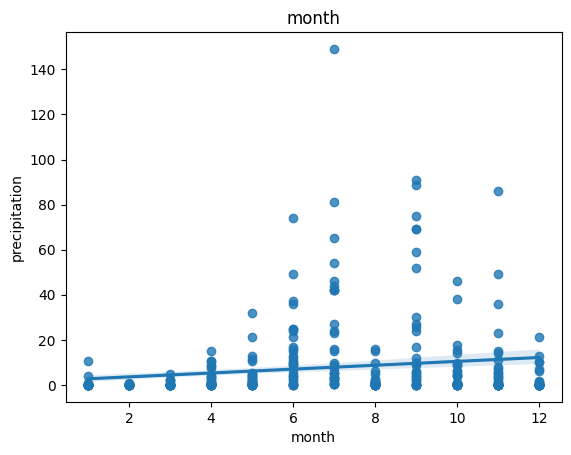

<Figure size 1500x1500 with 0 Axes>

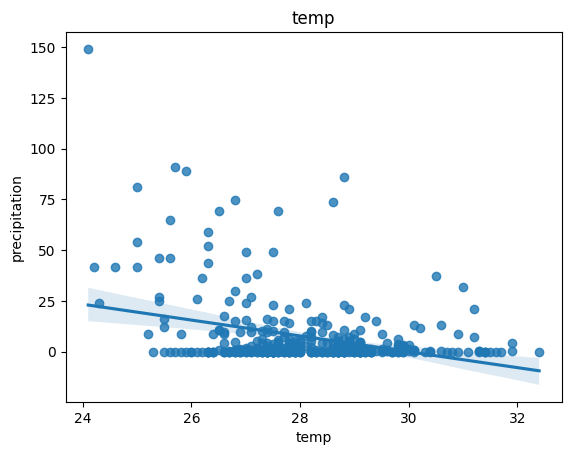

<Figure size 1500x1500 with 0 Axes>

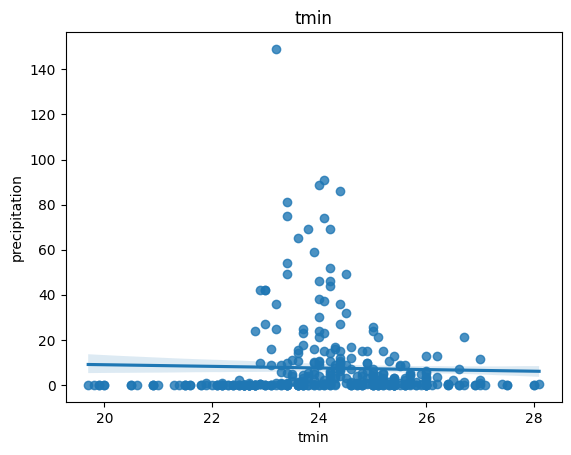

<Figure size 1500x1500 with 0 Axes>

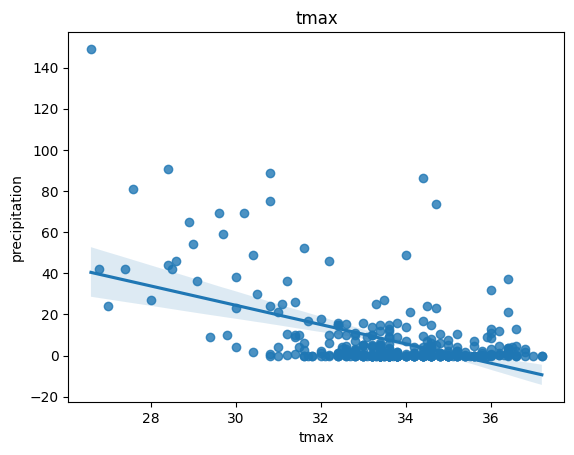

<Figure size 1500x1500 with 0 Axes>

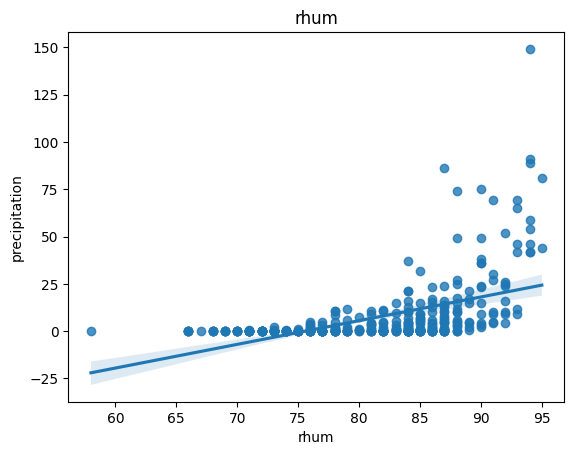

<Figure size 1500x1500 with 0 Axes>

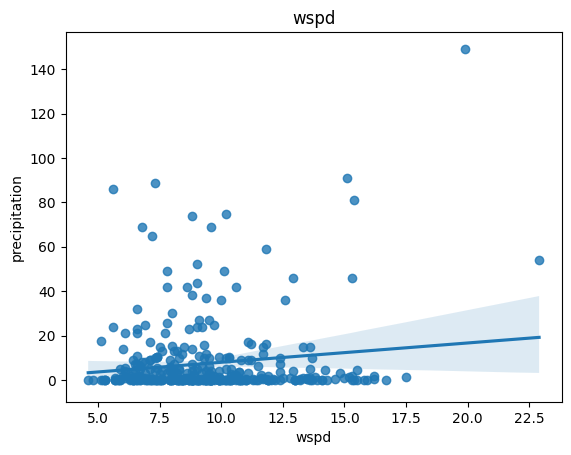

<Figure size 1500x1500 with 0 Axes>

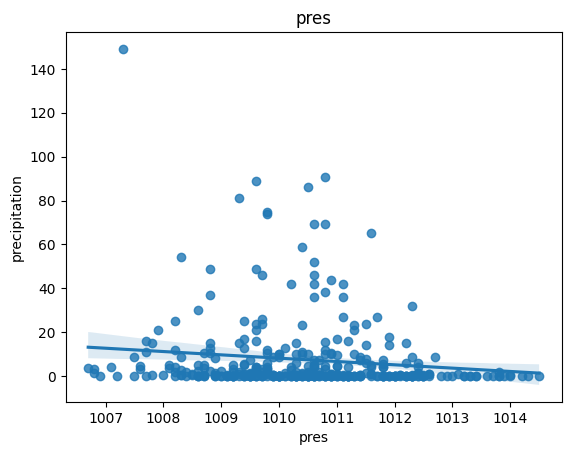

<Figure size 1500x1500 with 0 Axes>

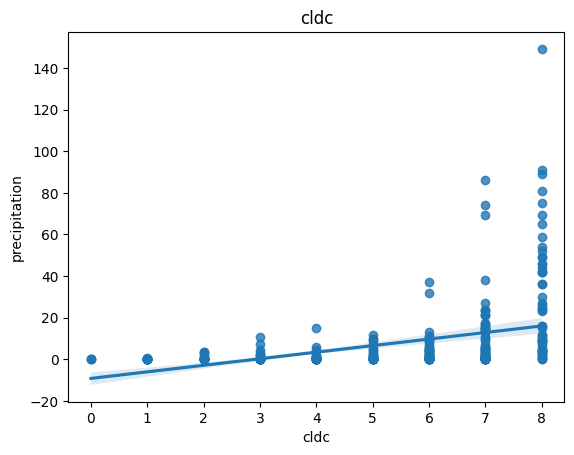

<Figure size 1500x1500 with 0 Axes>

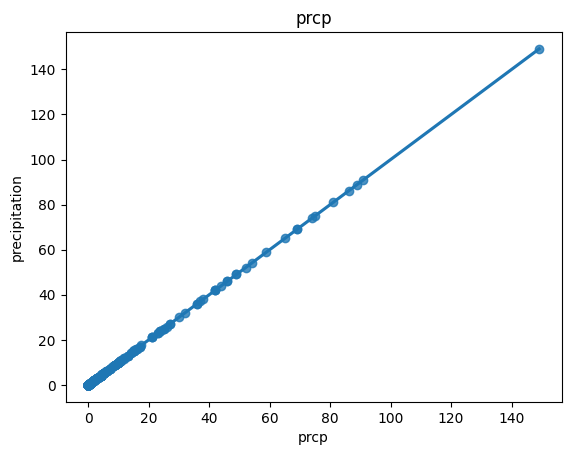

<Figure size 1500x1500 with 0 Axes>

In [5]:
for feature in data:
    dcb=data.copy()
    sns.regplot(x=data[feature],y='prcp',data=data)
    plt.xlabel(feature)
    plt.ylabel('precipitation')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

## EDA

In [6]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

year           0.0
month          0.0
day            0.0
temp           0.0
temp_source    0.0
tmin           0.0
tmin_source    0.0
tmax           0.0
tmax_source    0.0
rhum           0.0
rhum_source    0.0
prcp           0.0
prcp_source    0.0
wspd           0.0
wspd_source    0.0
pres           0.0
pres_source    0.0
cldc           0.0
cldc_source    0.0
dtype: float64

In [7]:
data.describe()

,month,temp,tmin,tmax,rhum,wspd,pres,cldc,prcp
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,6.526027,28.070685,24.169589,33.617534,81.531507,9.403014,1010.455068,5.273973,7.463836
std,3.452584,1.459750,1.489794,1.876728,6.908127,2.682978,1.490191,2.204268,16.975126
min,1.000000,24.100000,19.700000,26.600000,58.000000,4.600000,1006.700000,0.000000,0.000000
25%,4.000000,27.100000,23.300000,32.800000,76.000000,7.400000,1009.500000,4.000000,0.000000
50%,7.000000,27.900000,24.200000,33.600000,83.000000,9.000000,1010.500000,6.000000,0.500000
75%,10.000000,29.000000,25.200000,34.800000,87.000000,10.700000,1011.400000,7.000000,6.100000
max,12.000000,32.400000,28.100000,37.200000,95.000000,22.900000,1014.500000,8.000000,149.100000


In [8]:
from scipy.stats import skew
for feature in data:
    skewness=skew(data[feature])
    print(feature,skewness)

month -0.010456404305713107
temp 0.22864033525569205
tmin -0.2768337395430329
tmax -0.9232257037439668
rhum -0.33897250786743127
wspd 1.0803222243036894
pres 0.10095453014318159
cldc -0.5854291151726012
prcp 3.9198159862639748


| Skew Value | Shape                          | Interpretation                 |
| ---------- | ------------------------------ | ------------------------------ |
| ≈ 0        | Symmetric (normal-like)        | Ideal distribution             |
| > +0.5     | Right-skewed (long right tail) | Many low values, few high ones |
| < –0.5     | Left-skewed (long left tail)   | Many high values, few low ones |



In [9]:
# right-skewed
data['wspd_log'] = np.log1p(data['wspd'])               
print("wspd_log",skew(data["wspd_log"]))
df1=data[['temp','tmin','tmax','rhum',"wspd_log",'pres','cldc','prcp']]

wspd_log 0.3161372480205866


C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\965297544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wspd_log'] = np.log1p(data['wspd'])


C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


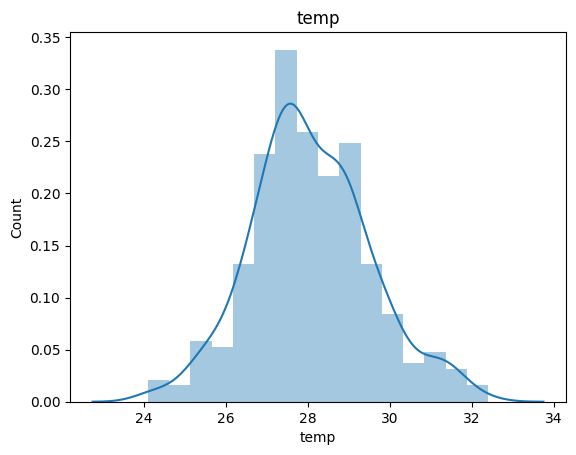

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


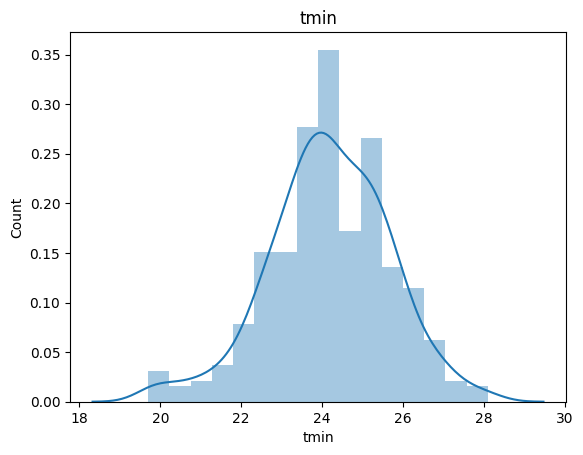

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


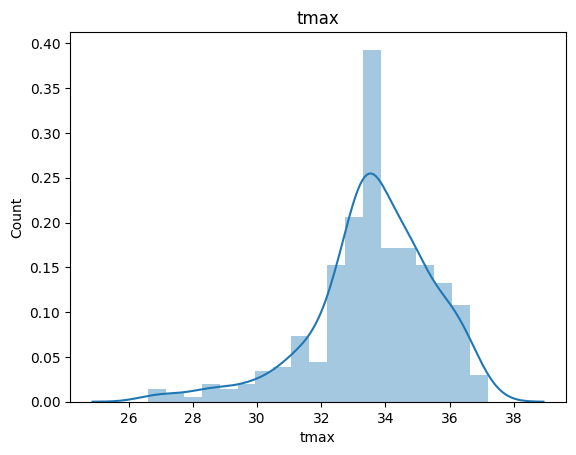

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


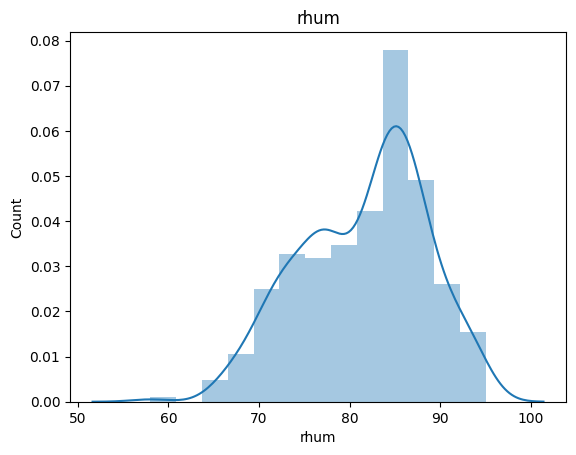

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


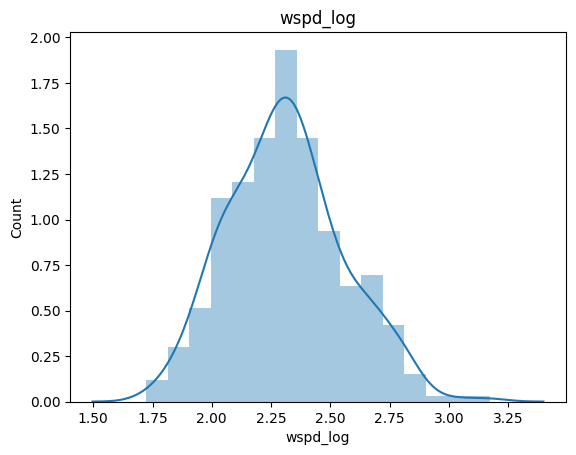

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


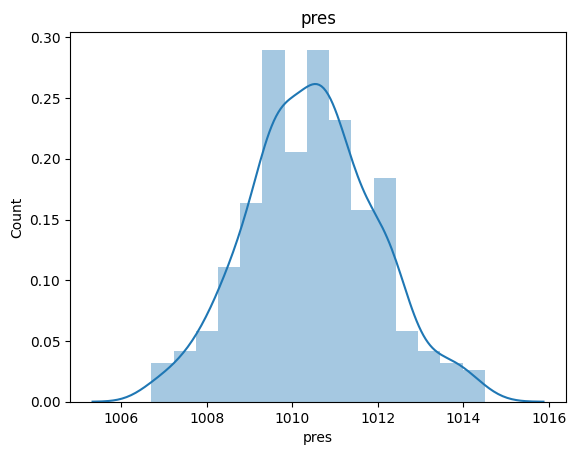

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


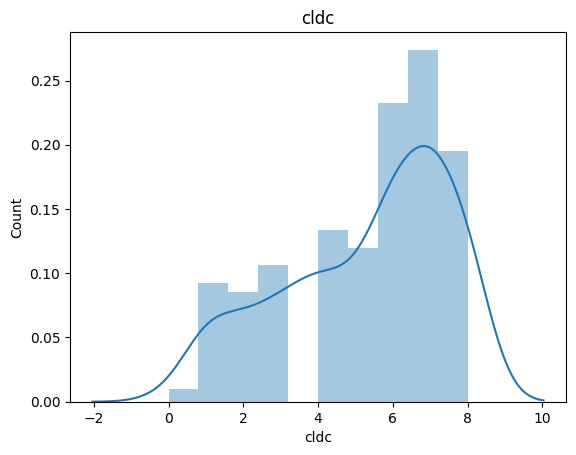

<Figure size 1500x1500 with 0 Axes>

C:\Users\syedy\AppData\Local\Temp\ipykernel_18948\924340999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature])


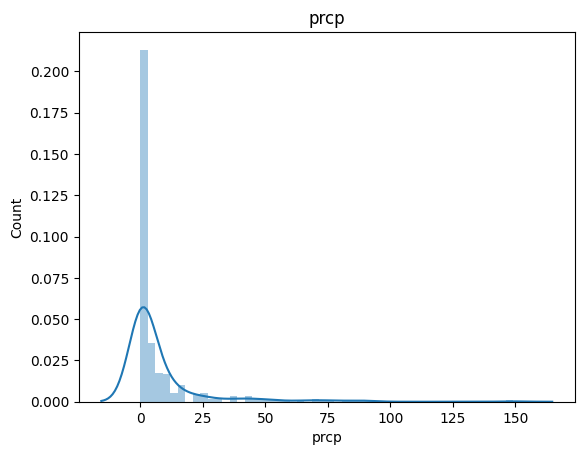

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in df1:
    dbc=df1.copy()
    sns.distplot(df1[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

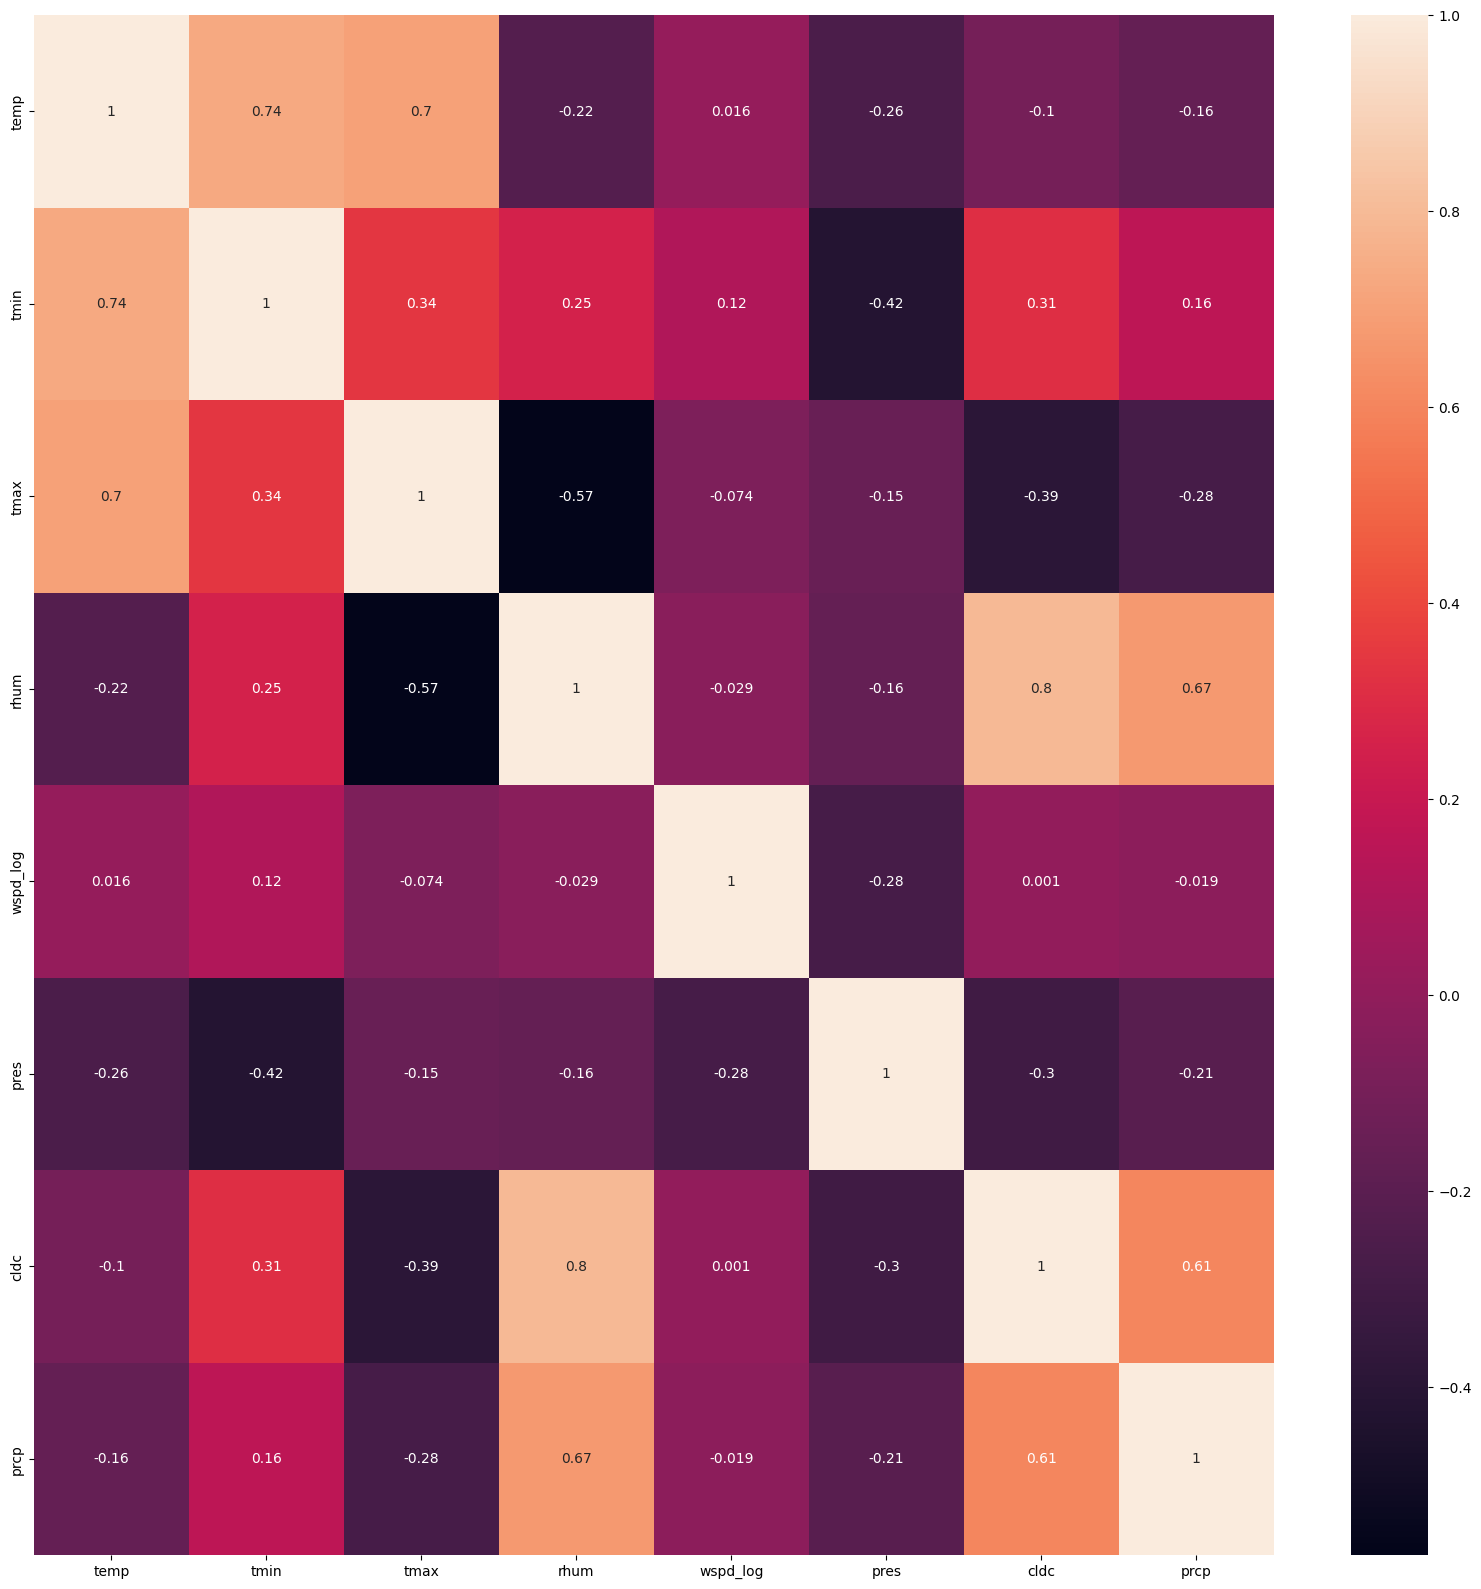

In [11]:
corrmat = df1.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

temp


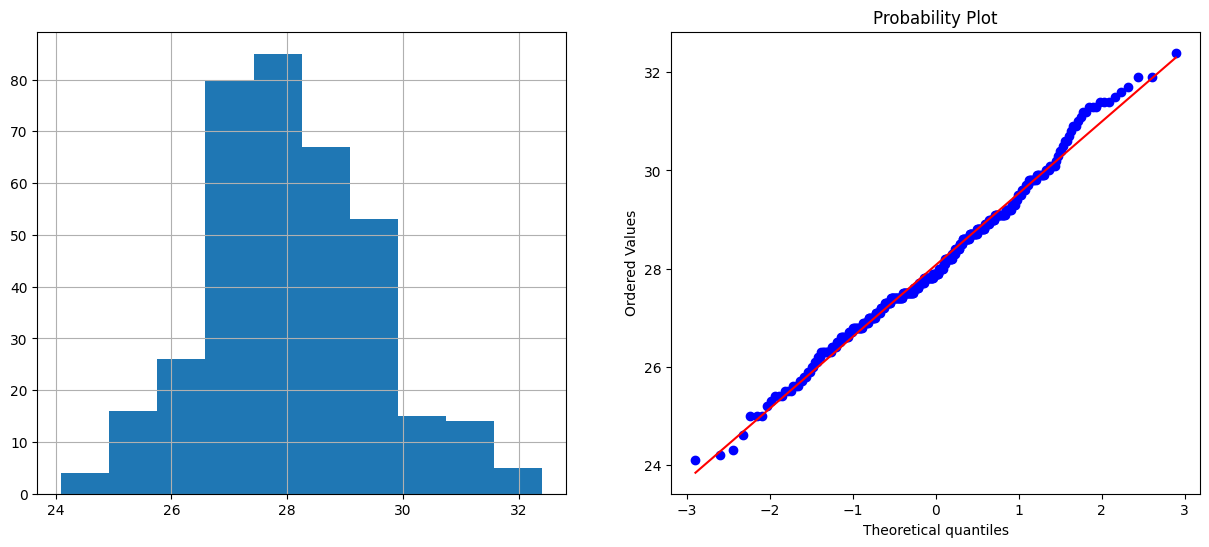

tmin


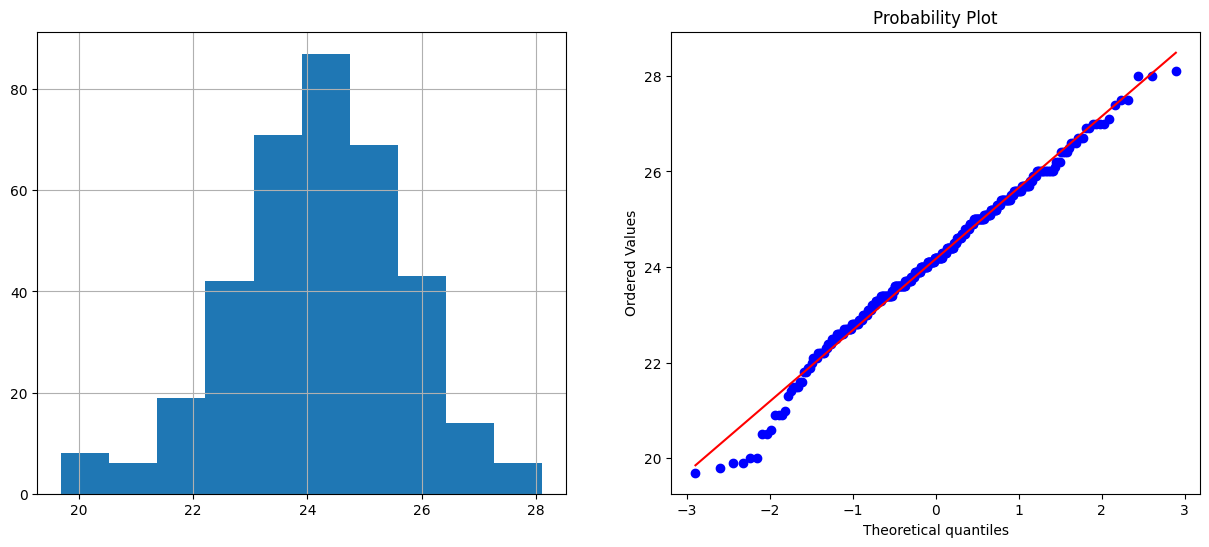

tmax


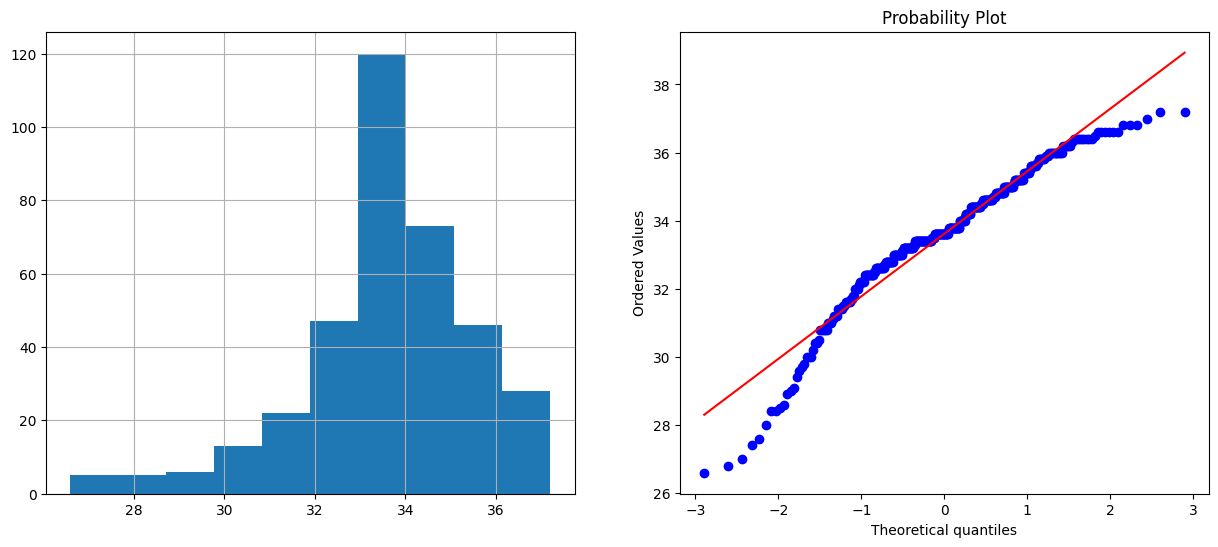

rhum


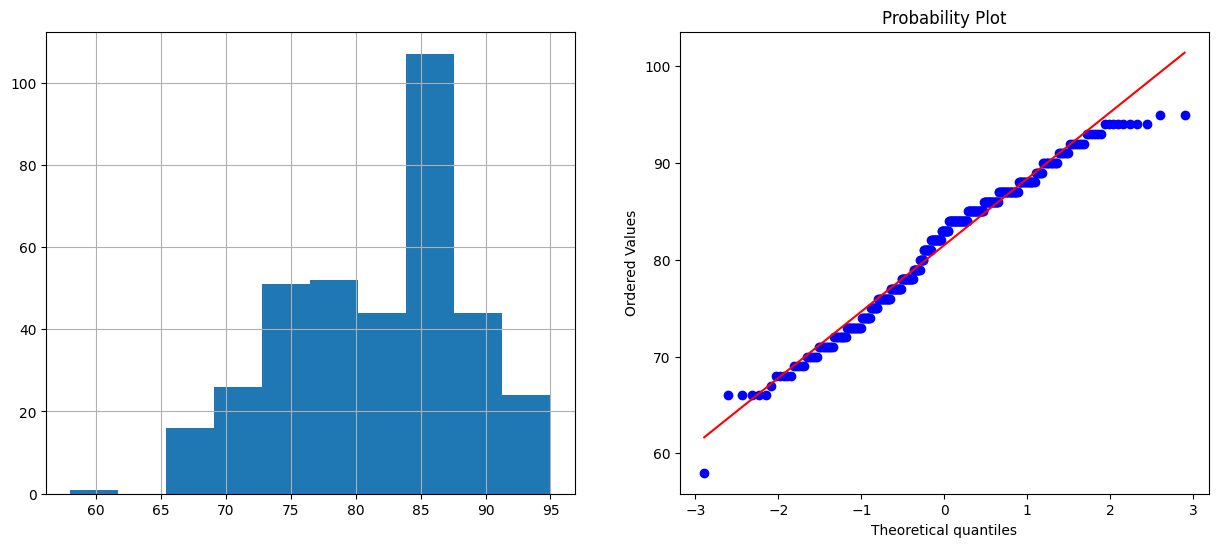

wspd_log


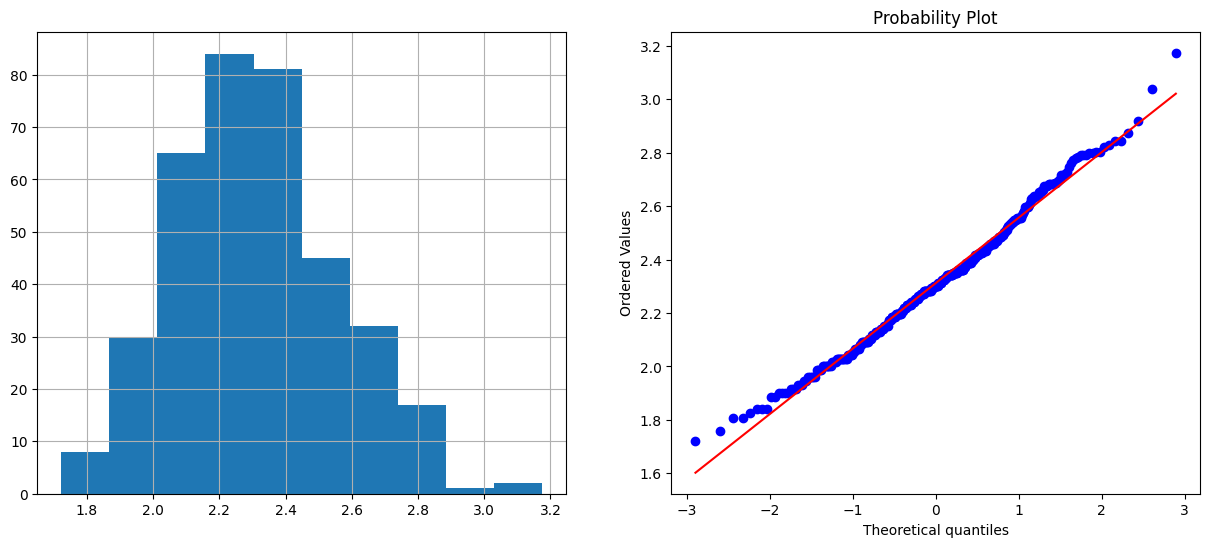

pres


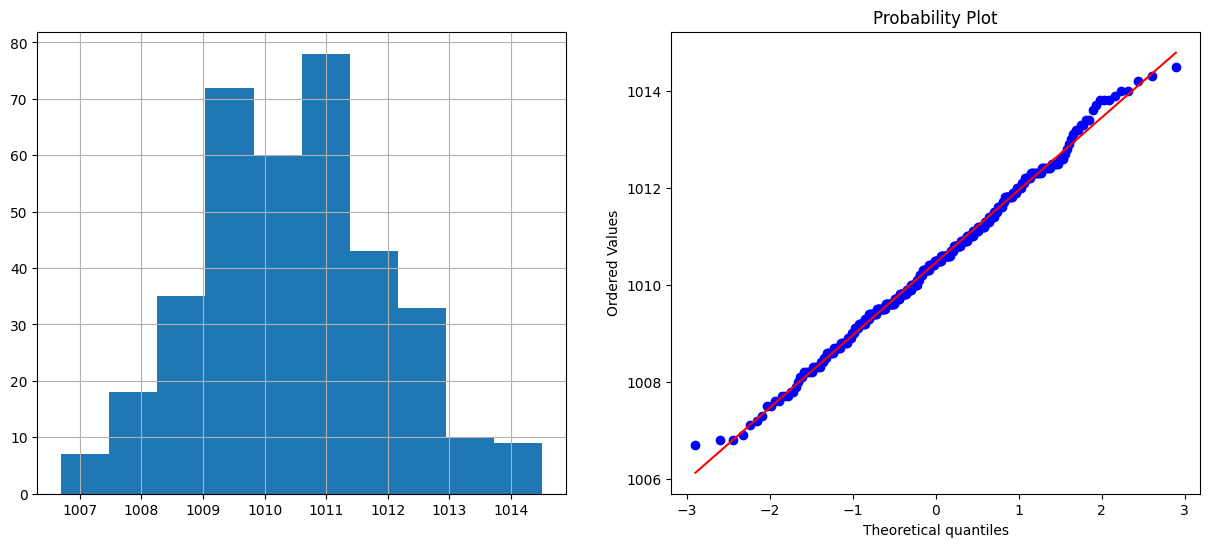

cldc


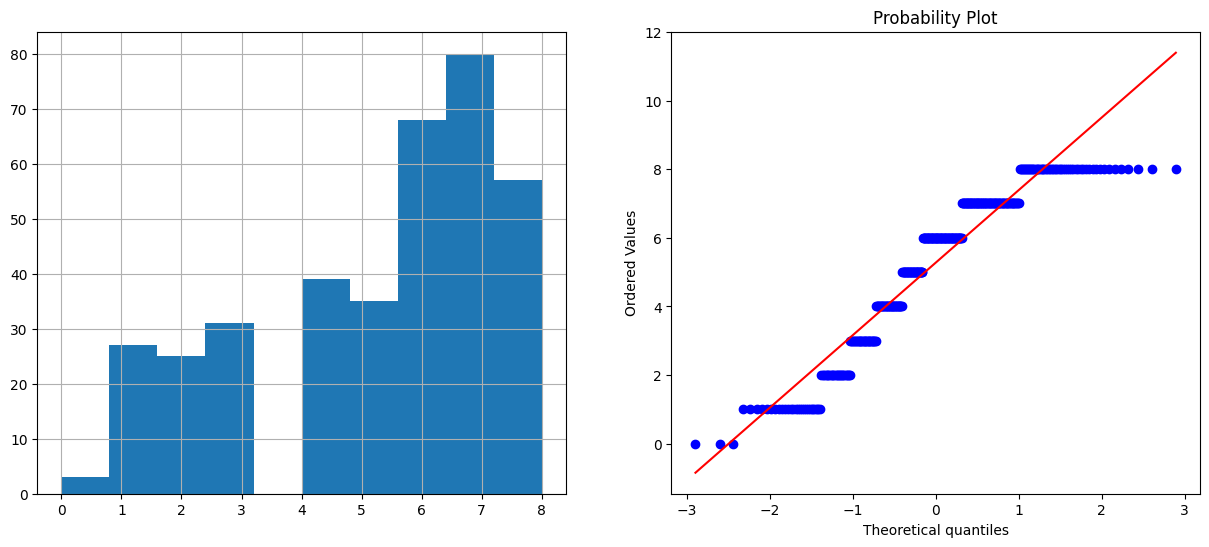

prcp


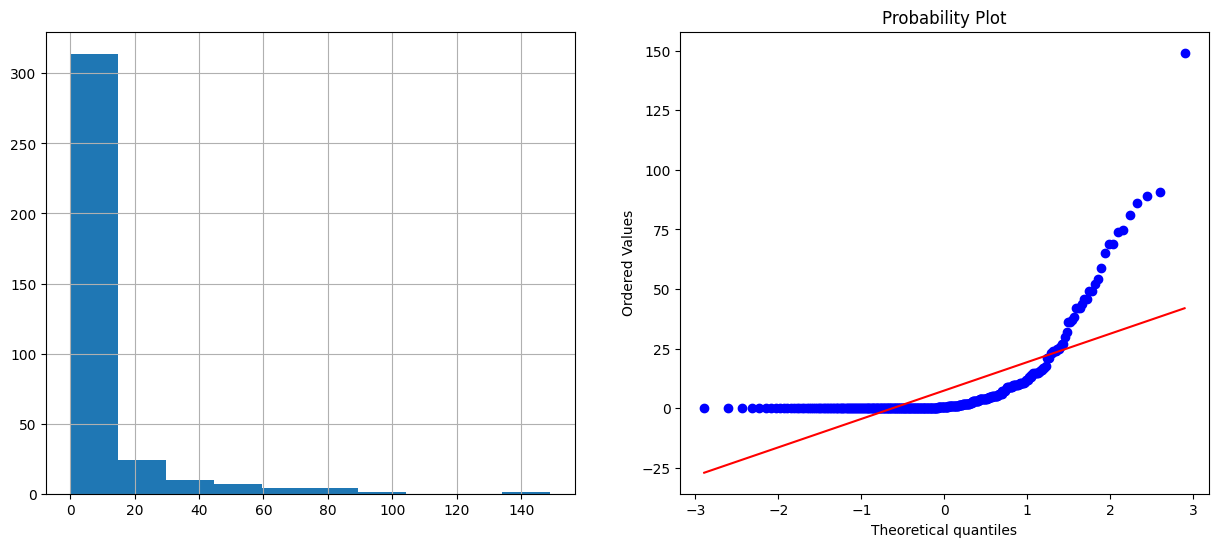

In [12]:
import scipy.stats as stats
for feature in df1:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df1[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df1[feature], dist="norm", plot=plt)
    plt.show()

In [15]:
df1['prcp_tomorrow'] = df1['prcp'].shift(-1)
df1['RainTomorrow'] = (df1['prcp_tomorrow'] > 0).astype(int)
df1=df1.drop('prcp_tomorrow',axis=1)

df1.dropna()
df1.head(15)


,temp,tmin,tmax,rhum,wspd_log,pres,cldc,prcp,RainTommarow,RainTomorrow
0,26.4,21.6,33.6,79,1.824549,1014.5,2,0.0,0,0
1,26.3,21.0,33.4,77,1.722767,1013.8,2,0.0,0,0
2,26.2,21.8,33.2,73,1.808289,1014.3,2,0.0,0,0
3,26.4,21.5,33.0,75,1.931521,1012.9,3,0.0,1,1
4,26.5,21.9,34.4,73,1.902108,1013.1,2,0.8,0,0
5,26.6,21.6,33.6,73,1.902108,1013.6,1,0.0,0,0
6,26.8,22.5,33.2,72,1.840550,1013.0,1,0.0,0,0
7,27.0,22.1,33.6,72,1.916923,1012.5,1,0.0,0,0
8,26.9,22.0,34.2,73,1.840550,1013.4,1,0.0,0,0
9,26.3,21.4,33.8,72,1.916923,1013.2,1,0.0,0,0


Text(0, 0.5, 'Count')

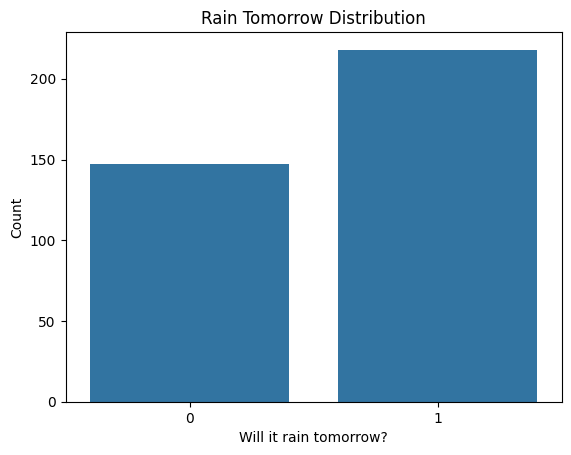

In [17]:
sns.countplot(x="RainTomorrow", data=df1)
plt.title("Rain Tomorrow Distribution")
plt.xlabel("Will it rain tomorrow?")
plt.ylabel("Count")


# ML with LogisticRegression,SVM,DecisionTree,XGBoost

In [79]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 10.1 MB/s eta 0:00:15
    --------------------------------------- 3.1/150.0 MB 9.7 MB/s eta 0:00:16
   - -------------------------------------- 5.5/150.0 MB 10.2 MB/s eta 0:00:15
   -- ------------------------------------- 7.6/150.0 MB 10.2 MB/s eta 0:00:14
   -- ------------------------------------- 10.0/150.0 MB 10.4 MB/s eta 0:00:14
   --- ------------------------------------ 12.1/150.0 MB 10.2 MB/s eta 0:00:14
   --- ------------------------------------ 14.2/150.0 MB 10.2 MB/s eta 0:00:14
   ---- ----------------------------------- 16.0/150.0 MB 10.0 MB/s eta 0:00:14
   ---- ----------------------------------- 18.4/150.0 MB 10.1 MB/s eta 0:00:14
   ----- ---------------------------------- 21.0/150.0 MB 10.2 MB/s eta 0:00:13
   ------ --------------------------------- 23.1/150.0 MB 10.3 MB/s eta 0:00:13
   ------ --------------------------------- 25.4/150.0

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [30]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['didnt rain', 'rain']); 
    ax.yaxis.set_ticklabels(['didnt rain', 'rain']); 
    plt.show() 

In [23]:
x=df1[['temp','tmin','tmax','rhum',"wspd_log",'pres','cldc','prcp']]
y=df1[['RainTommarow']].to_numpy()

In [24]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(x)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [49]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [55]:
y_prob = logreg_cv.predict_proba(X_test)[:, 1]  # Only class 1 probs

In [56]:
#  Apply custom threshold (change 0.6 to tune)
threshold = 0.6
y_pred_custom = (y_prob >= threshold).astype(int)


In [50]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7566666666666667


In [51]:
# Calculate accuracy on test data
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.75


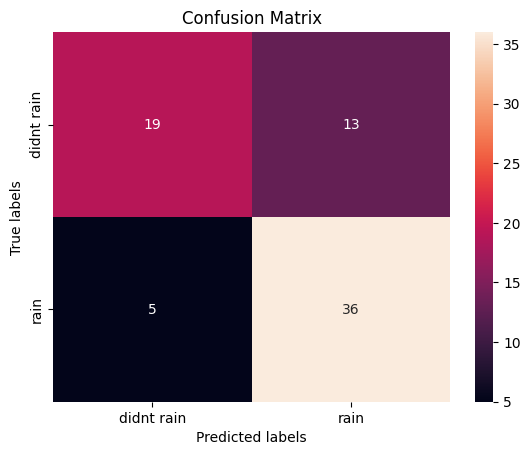

In [54]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [65]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.73      0.88      0.80        41

    accuracy                           0.75        73
   macro avg       0.76      0.74      0.74        73
weighted avg       0.76      0.75      0.75        73



 Confusion Matrix:


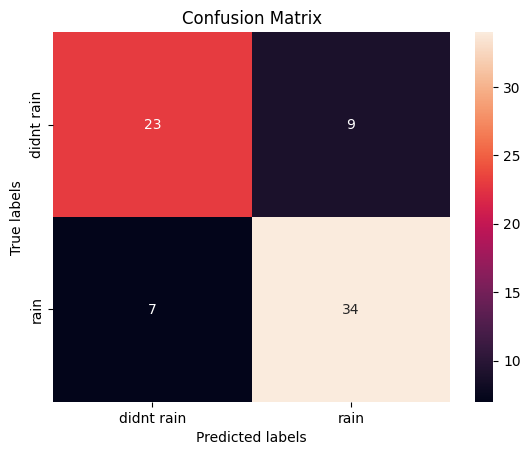

None


In [59]:
# 5. Evaluate with custom predictions
print(" Confusion Matrix:")
print(plot_confusion_matrix(Y_test, y_pred_custom))

In [64]:
print(classification_report(Y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.79      0.83      0.81        41

    accuracy                           0.78        73
   macro avg       0.78      0.77      0.78        73
weighted avg       0.78      0.78      0.78        73



In [66]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [67]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [68]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.7774712643678161


In [69]:
# Calculate accuracy on test data
test_accuracy = svm_cv.score(X_test, Y_test)

# Print the accuracy score
print(f"Test Accuracy: {test_accuracy:.4f}")  # Prints with 4 decimal places

Test Accuracy: 0.7534


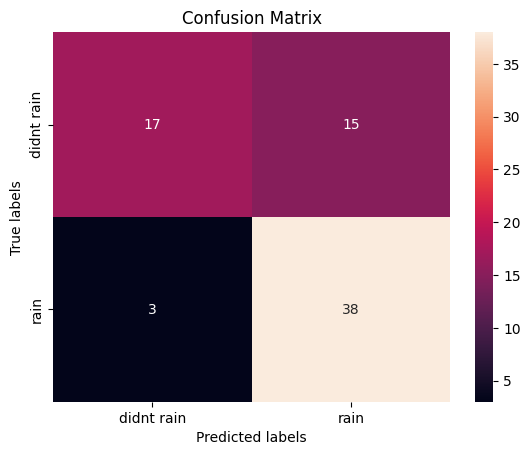

In [70]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [71]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.53      0.65        32
           1       0.72      0.93      0.81        41

    accuracy                           0.75        73
   macro avg       0.78      0.73      0.73        73
weighted avg       0.78      0.75      0.74        73



In [72]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [73]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train) 

C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\syedy\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [74]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.7602298850574712


Decision Tree Test Accuracy: 0.6849


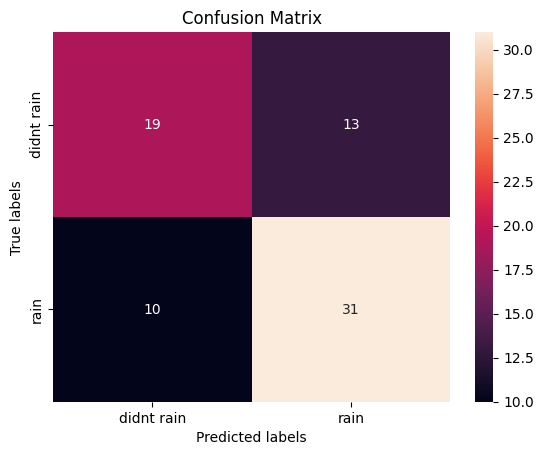

In [75]:
# Calculate accuracy on test data using the score method
test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and plot confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [83]:
params = {
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
grid = GridSearchCV(estimator=xgb, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)

C:\Users\syedy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

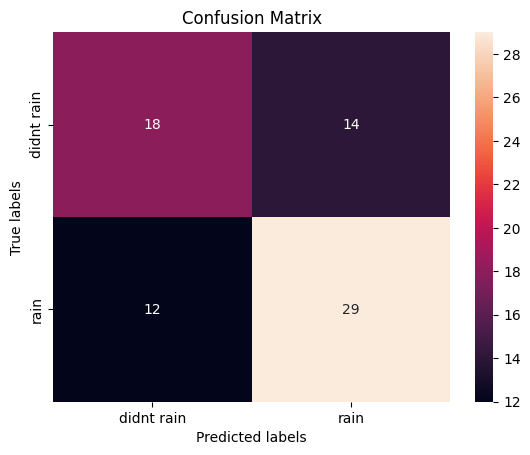

In [85]:
yhat = grid.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [87]:
print("Best Parameters:", grid.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, yhat))
print("\nClassification Report:\n", classification_report(Y_test, yhat))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Confusion Matrix:
 [[18 14]
 [12 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58        32
           1       0.67      0.71      0.69        41

    accuracy                           0.64        73
   macro avg       0.64      0.63      0.64        73
weighted avg       0.64      0.64      0.64        73



C:\Users\syedy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        32
           1       0.74      0.76      0.75        41

    accuracy                           0.71        73
   macro avg       0.71      0.71      0.71        73
weighted avg       0.71      0.71      0.71        73



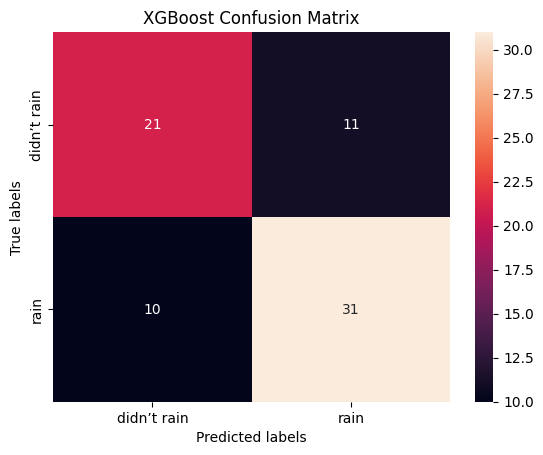

In [88]:
xgb = XGBClassifier(
    n_estimators=100,    # number of trees
    learning_rate=0.1,   # controls step size
    max_depth=3,           # limits overfitting
    subsample=0.8,          # 80% of data used in each tree
    colsample_bytree=0.8,   # 80% of features used
    gamma=0,                # min loss to split node
    use_label_encoder=False,
    eval_metric='logloss', 
    random_state=42
)

xgb.fit(X_train, Y_train)
yhat = xgb.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, yhat))
plot_confusion_matrix(Y_test,yhat)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
yhat = rf.predict(X_test)

C:\Users\syedy\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60        32
           1       0.69      0.71      0.70        41

    accuracy                           0.66        73
   macro avg       0.65      0.65      0.65        73
weighted avg       0.66      0.66      0.66        73



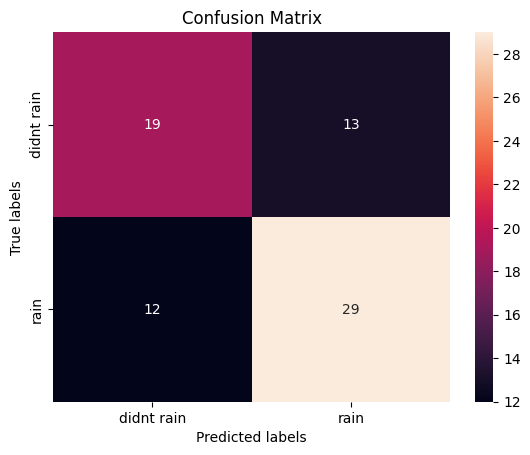

In [31]:
print("Classification Report:\n", classification_report(Y_test, yhat))
plot_confusion_matrix(Y_test,yhat)

# In This Analysis, Logistic Regression Overal had Highest accuracy followed by SVM

            precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.79      0.83      0.81        41

    accuracy                           0.78        73
   macro avg       0.78      0.77      0.78        73
weighted avg       0.78      0.78      0.78        73


              precision    recall  f1-score   support

           0       0.85      0.53      0.65        32
           1       0.72      0.93      0.81        41

    accuracy                           0.75        73
   macro avg       0.78      0.73      0.73        73
weighted avg       0.78      0.75      0.74        73